In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import imagenet_utils
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import pandas as pd
from keras.models import Model
import keras
import os
import tensorflow as tf
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.layers import Dense,Activation,Flatten,MaxPool2D,Conv2D,Dropout
from keras.layers.normalization import BatchNormalization
import keras.backend as K
import itertools
%matplotlib inline

Using TensorFlow backend.


# Load Datasets

In [2]:
from keras.datasets import cifar10
(X_train,y_train),(X_test, y_test) = cifar10.load_data()

# Data Augmentation

In [3]:
datagen = ImageDataGenerator(rotation_range=90,
                           shear_range = 0.2,
                           zoom_range=0.2,
                          horizontal_flip=True)
datagen.fit(X_train)

# One hot encoding

In [5]:
y_train_one_hot = to_categorical(y_train,10)
y_test_one_hot = to_categorical(y_test,10)

# Normalizing pixels

In [5]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

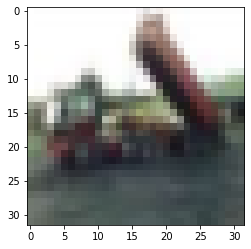

In [6]:
plt.imshow(X_train[2])

In [35]:
y_train[2]

array([9], dtype=uint8)

# CNN model 

In [10]:
K.clear_session()
model=Sequential()

model.add(Conv2D(32, (3,3),  input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 128)         147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)        

In [11]:
model.compile(Adam(lr=0.001),
            loss='categorical_crossentropy',         
              metrics=['accuracy'])

### Load model's weights for gaining last training accuracy

In [ ]:
model.load_weights('weights.hdf5')

# Train the model

In [13]:
epochs = 15

history = model.fit(X_train,
          y_train_one_hot,
          batch_size=32,
          epochs=epochs, 
          validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/15
35000/35000 [==============================] - 60s 2ms/step - loss: 43.2730 - accuracy: 0.6609 - val_loss: 2.7031 - val_accuracy: 0.4242
Epoch 2/15
35000/35000 [==============================] - 59s 2ms/step - loss: 1.9983 - accuracy: 0.4161 - val_loss: 1.9443 - val_accuracy: 0.4376
Epoch 3/15
35000/35000 [==============================] - 60s 2ms/step - loss: 1.5713 - accuracy: 0.4855 - val_loss: 1.7297 - val_accuracy: 0.4759
Epoch 4/15
35000/35000 [==============================] - 60s 2ms/step - loss: 1.4128 - accuracy: 0.5266 - val_loss: 1.6762 - val_accuracy: 0.5131
Epoch 5/15
35000/35000 [==============================] - 60s 2ms/step - loss: 1.2912 - accuracy: 0.5696 - val_loss: 1.6817 - val_accuracy: 0.5557
Epoch 6/15
35000/35000 [==============================] - 60s 2ms/step - loss: 1.2096 - accuracy: 0.6128 - val_loss: 1.5179 - val_accuracy: 0.5875
Epoch 7/15
35000/35000 [==============================] - 61s 2ms/s

# Evaluate using test data

In [95]:
model.evaluate(X_test,y_test_one_hot)

10000/10000 [==============================] - 7s 683us/step


[2.208891607093811, 0.6729000210762024]

# Visualize Accuracy

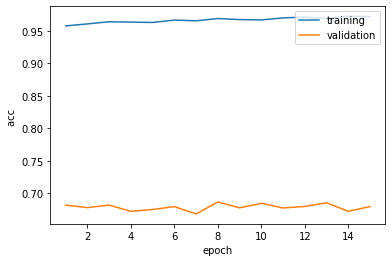

In [12]:
#Accuracy

epoch_nums = range(1, epochs+1)
training_acc = history.history["accuracy"]
validation_acc = history.history["val_accuracy"]
plt.plot(epoch_nums , training_acc)
plt.plot(epoch_nums , validation_acc)
plt.xlabel('epoch')
plt.ylabel('acc ')
plt.legend(['training','validation'], loc='upper right')
plt.show()

# Loss

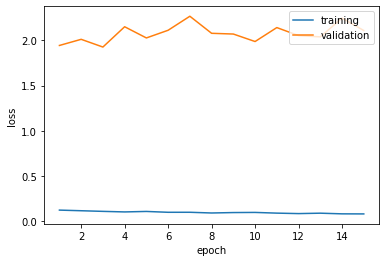

In [13]:

epoch_nums = range(1, epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums , training_loss)
plt.plot(epoch_nums , validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training','validation'], loc='upper right')
plt.show()

# Predict using images

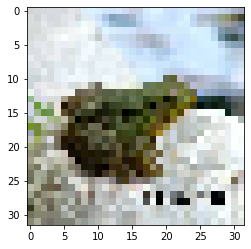

In [248]:
img_pred = image.load_img('frog6.jpg', target_size=(32,32,3))
plt.imshow(img_pred)
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

In [249]:
#Get the probabilities

probabilities = model.predict(img_pred)
probabilities

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [247]:
class_name =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

index = np.argsort(probabilities[0,:])
print('Most likely class :', class_name[index[9]] , ', Probability : ', probabilities[0 , index[9]])
print('Most second  likely class :', class_name[index[8]] , ', Probability : ', probabilities[0 , index[8]])
print('Most third  likely class :', class_name[index[7]] , ', Probability : ', probabilities[0 , index[7]])




Most likely class : frog , Probability :  1.0
Most second  likely class : truck , Probability :  0.0
Most third  likely class : ship , Probability :  0.0


# Save the model

In [ ]:
model.save('cifarcnn.h5')

In [ ]:
from keras.models import load_model
new_model = load_model('cifarcnn.h5')

new_model.summary()

# Save weights

In [ ]:
model.save_weights('weights.hdf5')